In [34]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix

%load_ext autoreload
%autoreload 2
%matplotlib inline 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
df = pd.read_csv('../data/churn_train.csv')

### Average distance

In [36]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0


In [37]:
sum(df['avg_dist'].notnull())

40000

In [38]:
adf = df['avg_dist']

In [39]:
print(df.shape)

(40000, 12)


Text(0,0.5,'Ave_dist')

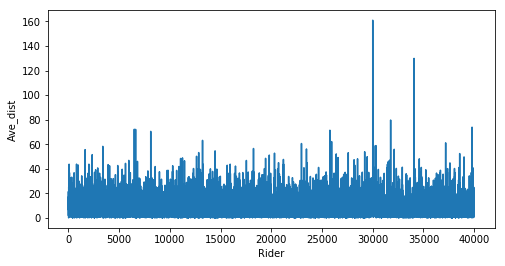

In [40]:
plt.figure(figsize=(8,4))
plt.subplot(1,1,1)
plt.plot(adf)
plt.xlabel("Rider")
plt.ylabel("Ave_dist")

In [41]:
ave_dist_mean = adf.mean()
ave_dist_max = adf.max()
print('Mean of ave_dist: {}\nMax of ave_dis: {}'.format(ave_dist_mean, ave_dist_max))

Mean of ave_dist: 5.791302000000004
Max of ave_dis: 160.96


Text(0.5,0,'Average_dist')

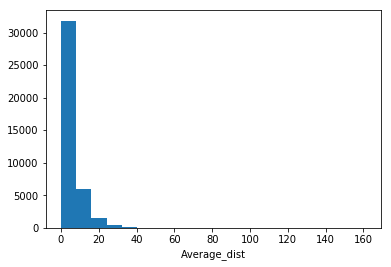

In [42]:
plt.hist(adf, bins=20);
plt.xlabel("Average_dist")

### Weekday %

In [44]:
wpdf = df['weekday_pct']

In [45]:
wpdf.head()

0    100.0
1      0.0
2    100.0
3    100.0
4    100.0
Name: weekday_pct, dtype: float64

In [50]:
sum(wpdf.notnull())

40000

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
avg_dist                  40000 non-null float64
avg_rating_by_driver      39838 non-null float64
avg_rating_of_driver      33472 non-null float64
avg_surge                 40000 non-null float64
city                      40000 non-null object
last_trip_date            40000 non-null object
phone                     39681 non-null object
signup_date               40000 non-null object
surge_pct                 40000 non-null float64
trips_in_first_30_days    40000 non-null int64
luxury_car_user           40000 non-null bool
weekday_pct               40000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.4+ MB


Text(0.5,0,'weekday_pct')

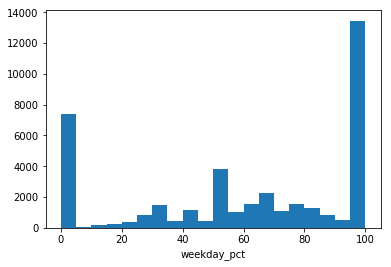

In [49]:
plt.hist(wpdf, bins=20);
plt.xlabel("weekday_pct")

### Luxury car user

In [67]:
working_df = df.copy()

In [68]:
ludf = working_df['luxury_car_user']

In [69]:
ludf.head()

0    False
1     True
2     True
3    False
4    False
Name: luxury_car_user, dtype: bool

In [71]:
ludf.value_counts()

False    24954
True     15046
Name: luxury_car_user, dtype: int64

In [72]:
num_ludf = ludf*1

In [73]:
num_ludf.head()

0    0
1    1
2    1
3    0
4    0
Name: luxury_car_user, dtype: int64

Text(0.5,0,'luxury_car_user')

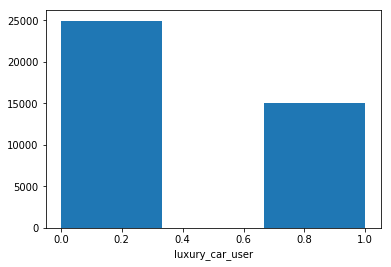

In [74]:
plt.hist(num_ludf, bins=3);
plt.xlabel("luxury_car_user")

In [76]:
working_df['num_Luxury_User'] = num_ludf

In [77]:
working_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,num_Luxury_User
0,6.94,5.0,5.0,1.00,Astapor,2014-05-03,Android,2014-01-12,0.0,0,False,100.0,0
1,8.06,5.0,5.0,1.00,Astapor,2014-01-26,Android,2014-01-25,0.0,2,True,0.0,1
2,21.50,4.0,NaN,1.00,Winterfell,2014-05-21,iPhone,2014-01-02,0.0,1,True,100.0,1
3,9.46,5.0,NaN,2.75,Winterfell,2014-01-10,Android,2014-01-09,100.0,1,False,100.0,0
4,13.77,5.0,NaN,1.00,Winterfell,2014-05-13,iPhone,2014-01-31,0.0,0,False,100.0,0
